# Alberto Isaac Pico Lara
# Diana Angélica Martínez Hernández
## Proyecto final de Minería de Datos

#### Librerías necesarias para exploración y tratamiento de datos

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from random import randint
import librosa
import librosa.display
import IPython.display as ipd
from IPython.display  import Audio
from sklearn import preprocessing
import seaborn as sns
import missingno as msno

#### Ruta a los archivos de audio de cada uno de los géneros (Prog, Salsa, Electro) y creación de listas con los nombres de los archivos en cada ruta, así como una lista que contenga todas las pistas

In [2]:
ruta_prog = '../prog'
pistas_p = os.listdir(ruta_prog)
ruta_salsa = '../salsa'
pistas_s = os.listdir(ruta_salsa)
ruta_electro = '../electronica'
pistas_e = os.listdir(ruta_electro)
pistas_unif = pistas_p + pistas_s + pistas_e
generos = ['prog', 'salsa', 'electronica']

In [3]:
print('# de pistas prog: ', len(pistas_p))
print('# de pistas de Salsa: ', len(pistas_s))
print('# de pistas de electro: ', len(pistas_e))
print('# total de pistas:', len(pistas_unif))

# de pistas prog:  130
# de pistas de Salsa:  130
# de pistas de electro:  130
# total de pistas: 390


### Ejemplos de análisis de una pista aleatoria por cada género

In [4]:
a = randint(0, 129)

In [5]:
samples_p, sr_p = librosa.load(ruta_prog + '/' + pistas_p[a], sr = None, mono = True, offset = 0.0, duration = None)
samples_s, sr_s = librosa.load(ruta_salsa + '/' + pistas_s[a], sr = None, mono = True, offset = 0.0, duration = None)
samples_e, sr_e = librosa.load(ruta_electro + '/' + pistas_e[a], sr = None, mono = True, offset = 0.0, duration = None)

/home/spqr14/Desarrollo/datascience/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/spqr14/Desarrollo/datascience/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/spqr14/Desarrollo/datascience/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [6]:
print('Tamaño de muestreo (samples) prog: ', len(samples_p))
print('Tasa de muestreo (sampling rate) prog: ', sr_p)
print('Tamaño de muestreo (samples) salsa: ', len(samples_s))
print('Tasa de muestreo (sampling rate) salsa: ', sr_s)
print('Tamaño de muestreo (samples) electro: ', len(samples_e))
print('Tasa de muestreo (sampling rate) electro: ', sr_e)

Tamaño de muestreo (samples) prog:  2644992
Tasa de muestreo (sampling rate) prog:  44100
Tamaño de muestreo (samples) salsa:  2638080
Tasa de muestreo (sampling rate) salsa:  44100
Tamaño de muestreo (samples) electro:  2641536
Tasa de muestreo (sampling rate) electro:  44100


#### Pistas cargadas

In [7]:
print(pistas_p[a])

12 Don't Stop Me Now_02m_00s__03m_00s.mp3


In [8]:
Audio(ruta_prog + '/' + pistas_p[a])

Text(0.5, 1.0, "12 Don't Stop Me Now_02m_00s__03m_00s.mp3")

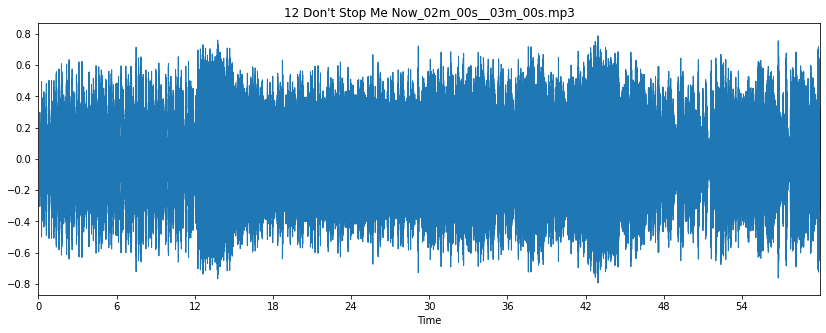

In [9]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples_p, sr = sr_p)
plt.title(pistas_p[a])

/home/spqr14/Desarrollo/datascience/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/spqr14/Desarrollo/datascience/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/spqr14/Desarrollo/datascience/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


Text(0.5, 1.0, "12 Don't Stop Me Now_02m_00s__03m_00s.mp3")

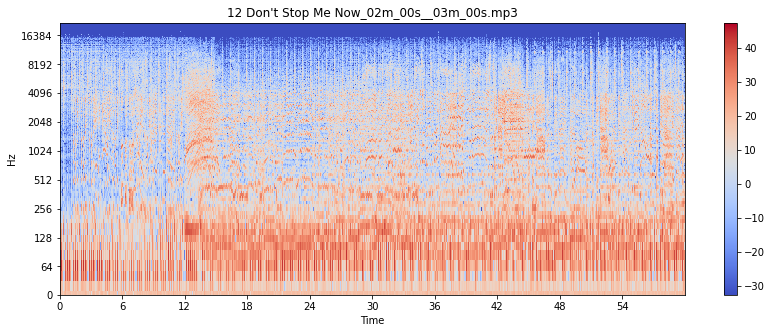

In [10]:
X = librosa.stft(samples_p)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr_p, x_axis='time', y_axis='log')
plt.colorbar()
plt.title(pistas_p[a])

In [11]:
print(pistas_s[a])

MENTIRAS-LA OCTAVA DIMENSION_01m_00s__02m_00s.mp3


In [13]:
Audio(ruta_salsa + '/' + pistas_s[a])

Text(0.5, 1.0, 'MENTIRAS-LA OCTAVA DIMENSION_01m_00s__02m_00s.mp3')

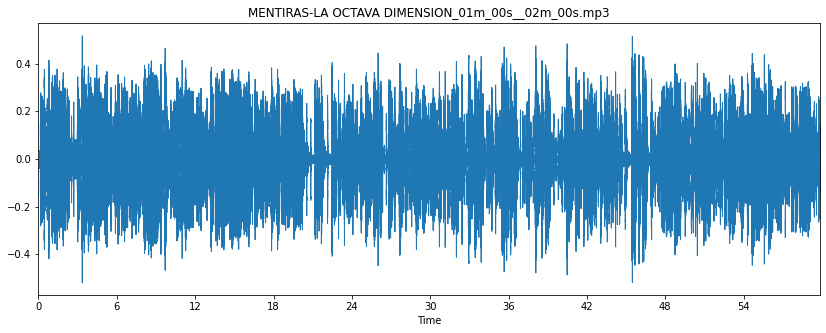

In [14]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples_s, sr = sr_s)
plt.title(pistas_s[a])

Text(0.5, 1.0, 'MENTIRAS-LA OCTAVA DIMENSION_01m_00s__02m_00s.mp3')

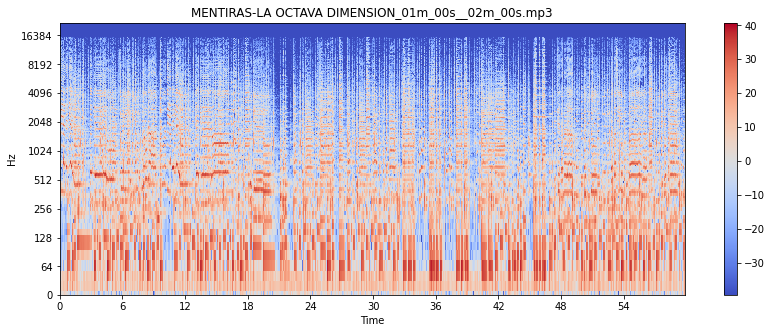

In [15]:
X = librosa.stft(samples_s)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr_s, x_axis='time', y_axis='log')
plt.colorbar()
plt.title(pistas_s[a])

In [16]:
print(pistas_e[a])

I Can Be Somebody_01m_00s__02m_00s.mp3


In [17]:
Audio(ruta_electro + '/' + pistas_e[a])

Text(0.5, 1.0, 'I Can Be Somebody_01m_00s__02m_00s.mp3')

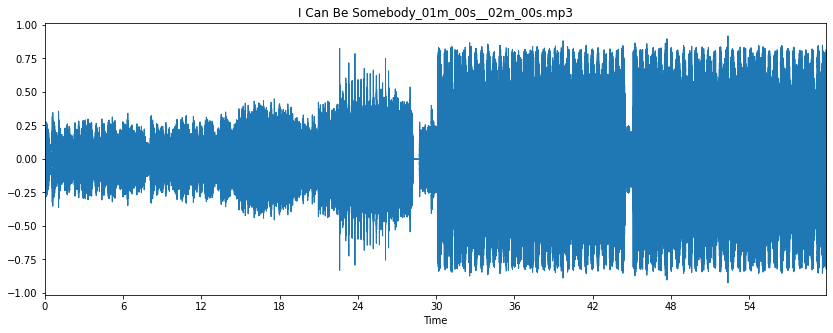

In [18]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples_e, sr = sr_e)
plt.title(pistas_e[a])

Text(0.5, 1.0, 'I Can Be Somebody_01m_00s__02m_00s.mp3')

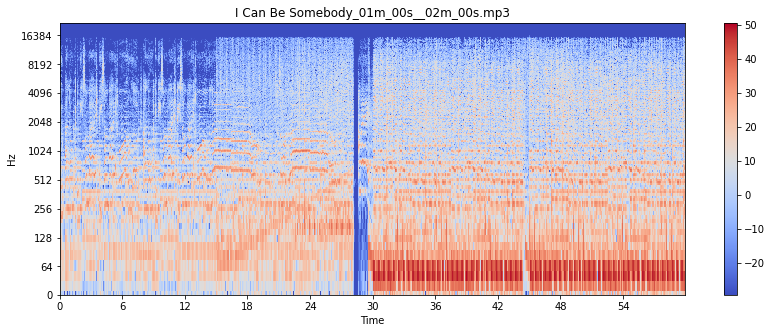

In [19]:
X = librosa.stft(samples_e)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr_e, x_axis='time', y_axis='log')
plt.colorbar()
plt.title(pistas_e[a])

### Selección de características ejemplo
Algunas de las caracerísticas que se pueden extraer del audio son las siguientes:
#### Característica espectrales del audio
- Zero crossing rate: tasa de cambios de signo a través de una señal
- Spectral centroid: Indica en donde está el "centro de masa" (mayor sendidad de muestras) de una pista de audio
- Spectrall Roll off: La medida de la forma de la señal, representa la frecuencia de la señal debajo de un porcentaje especifico.
- Spectral Bandwidth, ancho de banda espectral de la señal de audio.
- Mel Frequency cepstral coeficients: los MFCC de una señal son sunconjuntos de características que describen de manera concisa la forma general del espectro. Esta técnica se usa para el análisis de la voz humana 
- Chroma frequencies: Representación de los 12 semitonos que existen en la octava musical
#### Características rítmicas
- Tempograma: Estimación de los BPM de cada pista

En las siguientes líneas se muestra con una pista ejemplo la extracción y visualización de una pista, más adelante se les hará la extracción a las 390 pistas que forman parte del conjunto de datos elegido.

Text(0.5, 1.0, "12 Don't Stop Me Now_02m_00s__03m_00s.mp3")

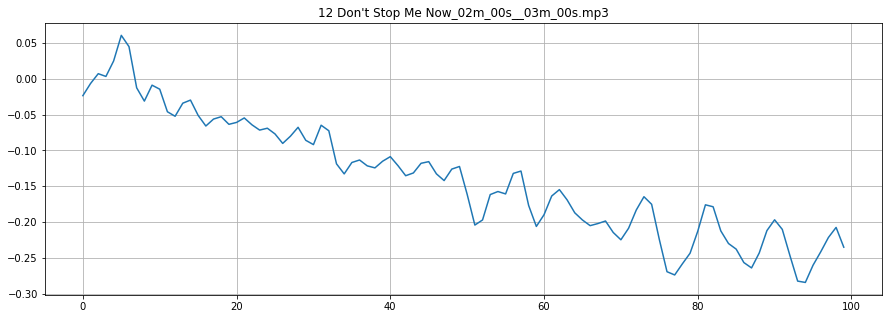

In [20]:
#Zero crossing rate
n0 = 9000
n1 = 9100
plt.figure(figsize=(15, 5))
plt.plot(samples_p[n0:n1])
plt.grid()
plt.title(pistas_p[a])

A simple vista se aprecian 3 cruces con el 0, se verifica con la lbrería librosa

In [21]:
zero_crossings= librosa.zero_crossings(samples_p[n0:n1], pad=False)
print(np.mean(zero_crossings))
print(sum(zero_crossings))

samples_p

0.02
2


array([ 0.        ,  0.        ,  0.        , ..., -0.06742859,
       -0.05755615, -0.04763794], dtype=float32)

In [22]:
#spectral centroid, calcula el crentoide espectral para cada cuadro de la señal
spectral_centroids = librosa.feature.spectral_centroid(samples_p, sr=sr_p)[0]
spectral_centroids.shape

(5167,)

In [23]:
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

In [24]:
def normalize(x, axis = 0):
    return preprocessing.minmax_scale(x, axis = axis)

Text(0.5, 1.0, "12 Don't Stop Me Now_02m_00s__03m_00s.mp3")

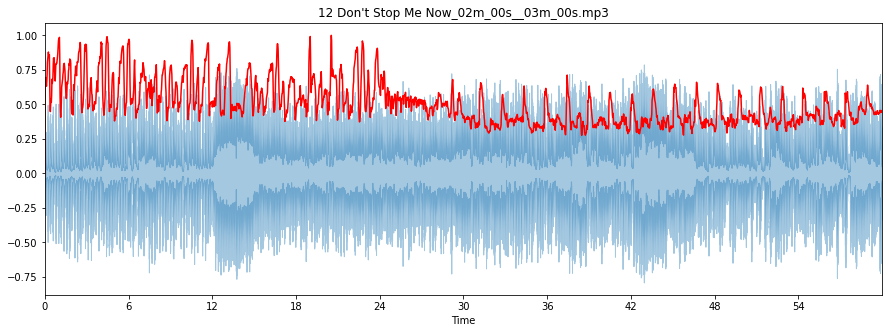

In [25]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(samples_p, sr=sr_p, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')
plt.title(pistas_p[a])

Text(0.5, 1.0, "12 Don't Stop Me Now_02m_00s__03m_00s.mp3")

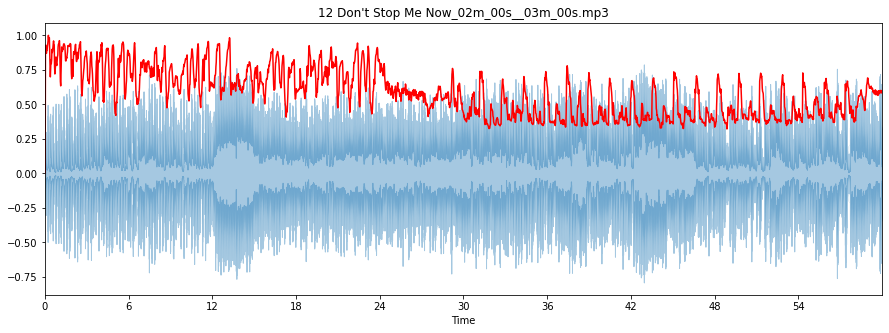

In [26]:
#spectral rolloff
spr = librosa.feature.spectral_rolloff(samples_p+0.01, sr = sr_p)[0]
plt.figure(figsize=(15, 5))
librosa.display.waveplot(samples_p, sr = sr_p, alpha = 0.4)
plt.plot(t, normalize(spr), color = 'r')
plt.title(pistas_p[a])

In [27]:
#MFCC
mfccs = librosa.feature.mfcc(samples_p, sr = sr_p)
mfccs.shape

(20, 5167)

In [28]:
#20 MFCC en 5,171 cuadros

Text(0.5, 1.0, "12 Don't Stop Me Now_02m_00s__03m_00s.mp3")

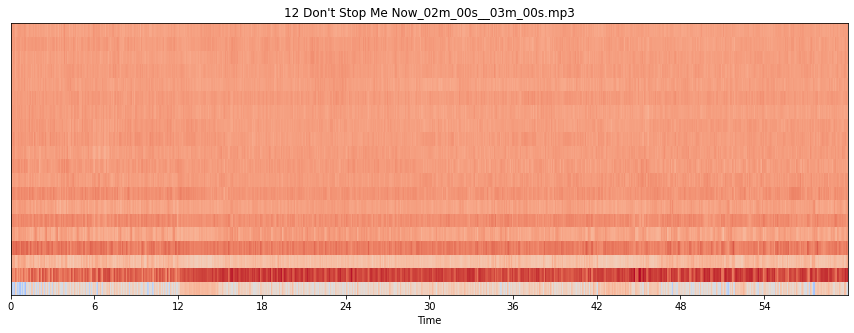

In [29]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, sr=sr_p, x_axis='time')
plt.title(pistas_p[a])

Text(0.5, 1.0, "12 Don't Stop Me Now_02m_00s__03m_00s.mp3")

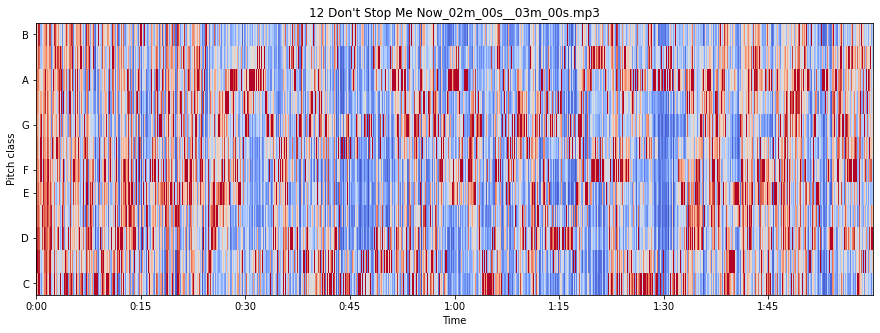

In [30]:
#Chroma frequencies: representación de la escala cromática en 12 semitonos
salto = 512
cromatica = librosa.feature.chroma_stft(samples_p, sr=sr_p, hop_length=salto)
plt.figure(figsize=(15, 5))
librosa.display.specshow(cromatica, x_axis='time', y_axis='chroma', hop_length=salto, cmap='coolwarm')
plt.title(pistas_p[a])

In [31]:
%%time
#Temmpograma
hop_length = 512
env = librosa.onset.onset_strength(y = samples_p, sr = sr_p, hop_length = hop_length)
tempograma = librosa.feature.tempogram(onset_envelope = env, sr = sr_p, hop_length = hop_length)

auto_c = librosa.autocorrelate(env, max_size = tempograma.shape[0])
auto_c = librosa.util.normalize(auto_c)

#mostrar los "beats"
tempo = librosa.beat.tempo(onset_envelope = env, sr = sr_p, hop_length = hop_length)[0]
print(tempo)
print(auto_c.shape)
print(np.mean(auto_c))

156.60511363636363
(384,)
0.6381208520716269
CPU times: user 1.51 s, sys: 652 ms, total: 2.16 s
Wall time: 1.44 s


/home/spqr14/Desarrollo/datascience/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
<ipython-input-32-62d316edaa6f>:16: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax[3].semilogx(freqs[1:], np.mean(tempograma[1:], axis=1),label='Media local de autocorrelación', basex=2)
<ipython-input-32-62d316edaa6f>:17: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax[3].semilogx(freqs[1:], auto_c[1:], '--', alpha=0.75,label='autocorrelación global', basex=2)


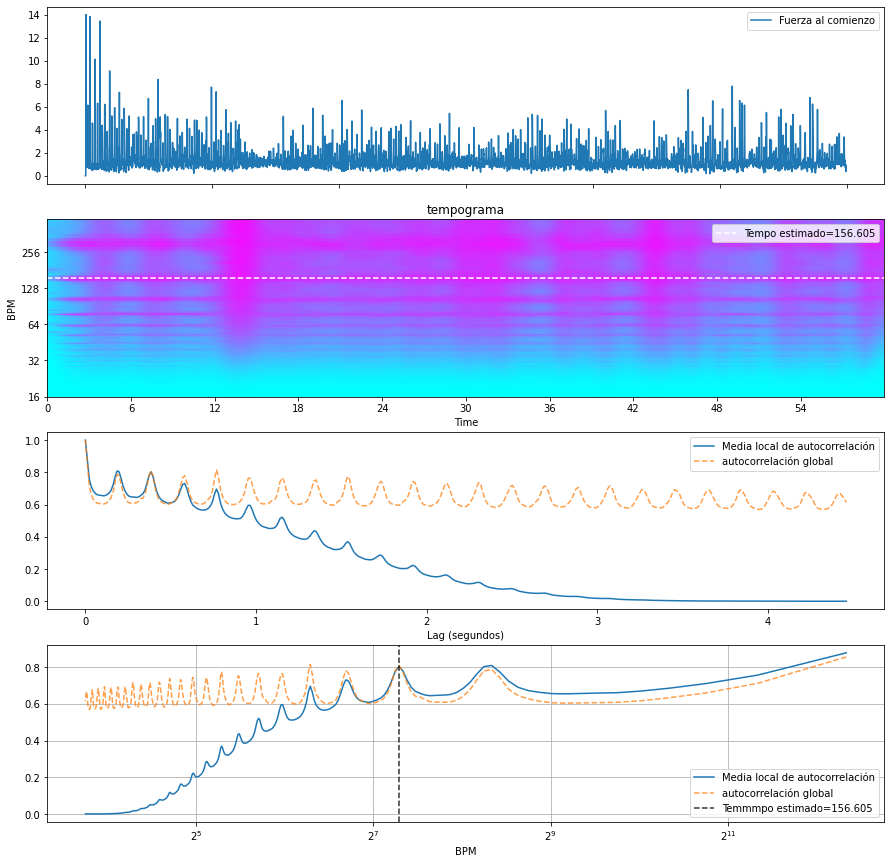

In [32]:
fig, ax = plt.subplots(nrows=4, figsize=(15, 15))
tiempos = librosa.times_like(env, sr=sr_p, hop_length=hop_length)
ax[0].plot(tiempos, env, label='Fuerza al comienzo')
ax[0].label_outer()
ax[0].legend(frameon=True)
librosa.display.specshow(tempograma, sr=sr_p, hop_length=hop_length,x_axis='time', y_axis='tempo', cmap='cool',ax=ax[1])
ax[1].axhline(tempo, color='w', linestyle='--', alpha=1,label='Tempo estimado={:g}'.format(tempo))
ax[1].legend(loc='upper right')
ax[1].set(title='tempograma')
x = np.linspace(0, tempograma.shape[0] * float(hop_length) / sr_p,num=tempograma.shape[0])
ax[2].plot(x, np.mean(tempograma, axis=1), label='Media local de autocorrelación')
ax[2].plot(x, auto_c, '--', alpha=0.75, label='autocorrelación global')
ax[2].set(xlabel='Lag (segundos)')
ax[2].legend(frameon=True)
freqs = librosa.tempo_frequencies(tempograma.shape[0], hop_length=hop_length, sr=sr_p)
ax[3].semilogx(freqs[1:], np.mean(tempograma[1:], axis=1),label='Media local de autocorrelación', basex=2)
ax[3].semilogx(freqs[1:], auto_c[1:], '--', alpha=0.75,label='autocorrelación global', basex=2)
ax[3].axvline(tempo, color='black', linestyle='--', alpha=.8,label='Temmmpo estimado={:g}'.format(tempo))
ax[3].legend(frameon=True)
ax[3].set(xlabel='BPM')
ax[3].grid(True)

/home/spqr14/Desarrollo/datascience/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


Text(0.5, 1.0, "tempograma de 12 Don't Stop Me Now_02m_00s__03m_00s.mp3")

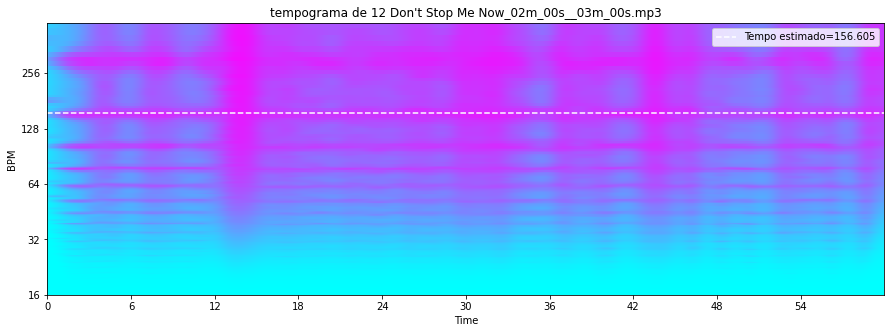

In [33]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(tempograma, sr=sr_p, hop_length=hop_length,x_axis='time', y_axis='tempo', cmap='cool')
plt.axhline(tempo, color='w', linestyle='--', alpha=1,label='Tempo estimado={:g}'.format(tempo))
plt.legend(loc='upper right')
plt.title('tempograma de ' + pistas_p[a])

## Extraer expectrograma de cada canción

In [34]:
import pathlib

## Extraer características de cada canción

### Importación de de dataset generado

In [35]:
pd.set_option('display.max_columns',500)

In [36]:
a = '../data_set/datos_musica.csv'

In [37]:
df = pd.read_csv(a, sep = ',', encoding = 'utf8')

In [38]:
df.head()

Unnamed: 0                                   archivo  zero_cr  \
0           0      08RosettaStoned_02m_00s__03m_00s.mp3        1   
1           1  12LaVillaStrangiato_02m_00s__03m_00s.mp3        5   
2           2         10RightInTwo_02m_00s__03m_00s.mp3        1   
3           3        CliffsofDover_02m_00s__03m_00s.mp3        7   
4           4             03Tandem_02m_00s__03m_00s.mp3        7   

   spectral_centroid  spectral_bw  spectral_rf     croma      mfcc_1  \
0        2293.509095  2683.886294  4757.554813  0.643105 -107.567894   
1        3141.585609  3664.541952  7047.756145  0.503582  -97.363564   
2        1680.061228  2162.740693  3263.894535  0.511010 -186.118713   
3        3550.627527  3837.029126  8001.494493  0.369874 -142.130707   
4        3354.309483  3504.496655  7045.300942  0.555797  -43.405849   

       mfcc_2     mfcc_3     mfcc_4     mfcc_5     mfcc_6     mfcc_7  \
0  152.844116 -47.212082  50.548176  13.318098  22.069689   3.088564   
1  138.735413 -31.410593  44.795269  -9.141349  32.790367 -17.083845   
2  182.038437 -33.291286  14.278953  24.466728  25.350159  -0.241039   
3  124.016747 -28.411285  71.573174  -7.814272  39.571209 -25.599236   
4  126.121994 -45.979034  67.328064 -10.203604  28.056236 -13.199381   

      mfcc_8     mfcc_9    mfcc_10   mfcc_11    mfcc_12   mfcc_13   mfcc_14  \
0  17.724556   1.989238  14.602591  7.684421   5.756142  6.381130  3.533900   
1  13.887798  -9.632196  15.888204 -2.834174   4.603606 -9.116914 -1.892696   
2  12.623992   1.569721   2.149368  1.742047  -0.369495 -0.509848 -1.499376   
3   9.665070 -18.384262  11.907782 -9.657818   1.648516 -5.068522  2.381685   
4  22.499807  -4.032993  18.731100  1.584014  10.170861  2.690039  4.339613   

    mfcc_15   mfcc_16   mfcc_17   mfcc_18   mfcc_19   mfcc_20         BPM  \
0  3.980881  0.115263 -2.570839 -3.316376  3.695076 -3.231804  114.843750   
1 -4.428424 -1.632581 -6.181627 -6.994590 -1.032068 -1.391677  103.359375   
2  1.330057 -2.710043 -3.433610 -5.454858 -0.333768 -5.713842  117.453835   
3 -3.611597 -3.626019  0.854850 -0.206339  4.414690 -5.993470   95.703125   
4  3.185012 -5.508703 -0.216938 -8.121754  2.781256 -5.203200  143.554688   

     auto_c genero  
0  0.584401   prog  
1  0.606677   prog  
2  0.606784   prog  
3  0.579578   prog  
4  0.696015   prog

In [39]:
df.tail()

Unnamed: 0                                            archivo  zero_cr  \
385         385                     JungleBae_01m_00s__02m_00s.mp3        0   
386         386                         RASTA_01m_00s__02m_00s.mp3       11   
387         387                      Reckless_01m_00s__02m_00s.mp3        0   
388         388                        Krater_01m_00s__02m_00s.mp3        6   
389         389  456MakeSomeNoise(DeorroRemix)_01m_00s__02m_00s...       10   

     spectral_centroid  spectral_bw  spectral_rf     croma     mfcc_1  \
385        3779.652769  3869.758625  8130.712153  0.551251 -11.051632   
386        4137.144823  3792.742738  8497.862780  0.549925 -66.424446   
387        4128.557988  3621.254511  8180.170802  0.578128 -41.275997   
388        3452.307281  3320.949943  7031.678968  0.569218 -74.096519   
389        4017.641481  3697.407863  8188.597008  0.540007 -26.945227   

         mfcc_2     mfcc_3     mfcc_4     mfcc_5     mfcc_6     mfcc_7  \
385  122.787086 -39.625397  42.033005 -26.507195  30.913094 -19.432491   
386  102.736069 -45.718067  59.571732 -19.742508  40.078110 -17.179028   
387   91.801277 -71.001747  39.332413 -32.403278  28.891922 -17.177076   
388  110.111351 -62.542309  44.250938 -17.907671  31.221333  -7.763180   
389  112.117798 -54.145309  59.633564 -30.593407  42.807468  -9.217725   

        mfcc_8     mfcc_9    mfcc_10   mfcc_11   mfcc_12   mfcc_13   mfcc_14  \
385  20.237757  -9.788039  12.867553 -6.959249  5.861841  0.089129  0.610427   
386  21.637266  -8.124650  13.257261 -1.546238  8.515308  2.276206  3.763591   
387  18.814869  -9.812453   8.266385 -3.661413  5.125349  2.822936  1.377450   
388  16.104729  -5.606269   8.063802  0.062140  5.332197  6.380871  4.751428   
389  21.356928 -11.464149  10.837396 -3.102428  3.838598  5.748007  2.433439   

      mfcc_15   mfcc_16   mfcc_17   mfcc_18    mfcc_19   mfcc_20         BPM  \
385  2.437625 -3.428694  3.982030 -6.217256   7.249422 -3.981704  129.199219   
386  3.035098 -3.323555  4.815642 -6.009607   6.773786 -3.861818  129.199219   
387  5.430400 -1.442914  7.194168 -1.599219   7.708047 -2.012374  129.199219   
388  8.165768 -0.022410  5.887846 -1.152788   9.140816 -0.851999  129.199219   
389  4.187824 -8.400435  3.062189 -3.636799  11.610293 -5.401374  129.199219   

       auto_c       genero  
385  0.499707  electronica  
386  0.400527  electronica  
387  0.644191  electronica  
388  0.588396  electronica  
389  0.637685  electronica

In [40]:
var = list(df.columns)

In [41]:
var

['Unnamed: 0',
 'archivo',
 'zero_cr',
 'spectral_centroid',
 'spectral_bw',
 'spectral_rf',
 'croma',
 'mfcc_1',
 'mfcc_2',
 'mfcc_3',
 'mfcc_4',
 'mfcc_5',
 'mfcc_6',
 'mfcc_7',
 'mfcc_8',
 'mfcc_9',
 'mfcc_10',
 'mfcc_11',
 'mfcc_12',
 'mfcc_13',
 'mfcc_14',
 'mfcc_15',
 'mfcc_16',
 'mfcc_17',
 'mfcc_18',
 'mfcc_19',
 'mfcc_20',
 'BPM',
 'auto_c',
 'genero']

In [42]:
del(df['Unnamed: 0'])

### Exploración

In [43]:
df.head()

archivo  zero_cr  spectral_centroid  \
0      08RosettaStoned_02m_00s__03m_00s.mp3        1        2293.509095   
1  12LaVillaStrangiato_02m_00s__03m_00s.mp3        5        3141.585609   
2         10RightInTwo_02m_00s__03m_00s.mp3        1        1680.061228   
3        CliffsofDover_02m_00s__03m_00s.mp3        7        3550.627527   
4             03Tandem_02m_00s__03m_00s.mp3        7        3354.309483   

   spectral_bw  spectral_rf     croma      mfcc_1      mfcc_2     mfcc_3  \
0  2683.886294  4757.554813  0.643105 -107.567894  152.844116 -47.212082   
1  3664.541952  7047.756145  0.503582  -97.363564  138.735413 -31.410593   
2  2162.740693  3263.894535  0.511010 -186.118713  182.038437 -33.291286   
3  3837.029126  8001.494493  0.369874 -142.130707  124.016747 -28.411285   
4  3504.496655  7045.300942  0.555797  -43.405849  126.121994 -45.979034   

      mfcc_4     mfcc_5     mfcc_6     mfcc_7     mfcc_8     mfcc_9  \
0  50.548176  13.318098  22.069689   3.088564  17.724556   1.989238   
1  44.795269  -9.141349  32.790367 -17.083845  13.887798  -9.632196   
2  14.278953  24.466728  25.350159  -0.241039  12.623992   1.569721   
3  71.573174  -7.814272  39.571209 -25.599236   9.665070 -18.384262   
4  67.328064 -10.203604  28.056236 -13.199381  22.499807  -4.032993   

     mfcc_10   mfcc_11    mfcc_12   mfcc_13   mfcc_14   mfcc_15   mfcc_16  \
0  14.602591  7.684421   5.756142  6.381130  3.533900  3.980881  0.115263   
1  15.888204 -2.834174   4.603606 -9.116914 -1.892696 -4.428424 -1.632581   
2   2.149368  1.742047  -0.369495 -0.509848 -1.499376  1.330057 -2.710043   
3  11.907782 -9.657818   1.648516 -5.068522  2.381685 -3.611597 -3.626019   
4  18.731100  1.584014  10.170861  2.690039  4.339613  3.185012 -5.508703   

    mfcc_17   mfcc_18   mfcc_19   mfcc_20         BPM    auto_c genero  
0 -2.570839 -3.316376  3.695076 -3.231804  114.843750  0.584401   prog  
1 -6.181627 -6.994590 -1.032068 -1.391677  103.359375  0.606677   prog  
2 -3.433610 -5.454858 -0.333768 -5.713842  117.453835  0.606784   prog  
3  0.854850 -0.206339  4.414690 -5.993470   95.703125  0.579578   prog  
4 -0.216938 -8.121754  2.781256 -5.203200  143.554688  0.696015   prog

In [44]:
df.shape

(390, 29)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   archivo            390 non-null    object 
 1   zero_cr            390 non-null    int64  
 2   spectral_centroid  390 non-null    float64
 3   spectral_bw        390 non-null    float64
 4   spectral_rf        390 non-null    float64
 5   croma              390 non-null    float64
 6   mfcc_1             390 non-null    float64
 7   mfcc_2             390 non-null    float64
 8   mfcc_3             390 non-null    float64
 9   mfcc_4             390 non-null    float64
 10  mfcc_5             390 non-null    float64
 11  mfcc_6             390 non-null    float64
 12  mfcc_7             390 non-null    float64
 13  mfcc_8             390 non-null    float64
 14  mfcc_9             390 non-null    float64
 15  mfcc_10            390 non-null    float64
 16  mfcc_11            390 non

In [46]:
df.isnull().any().any()

False

<AxesSubplot:>

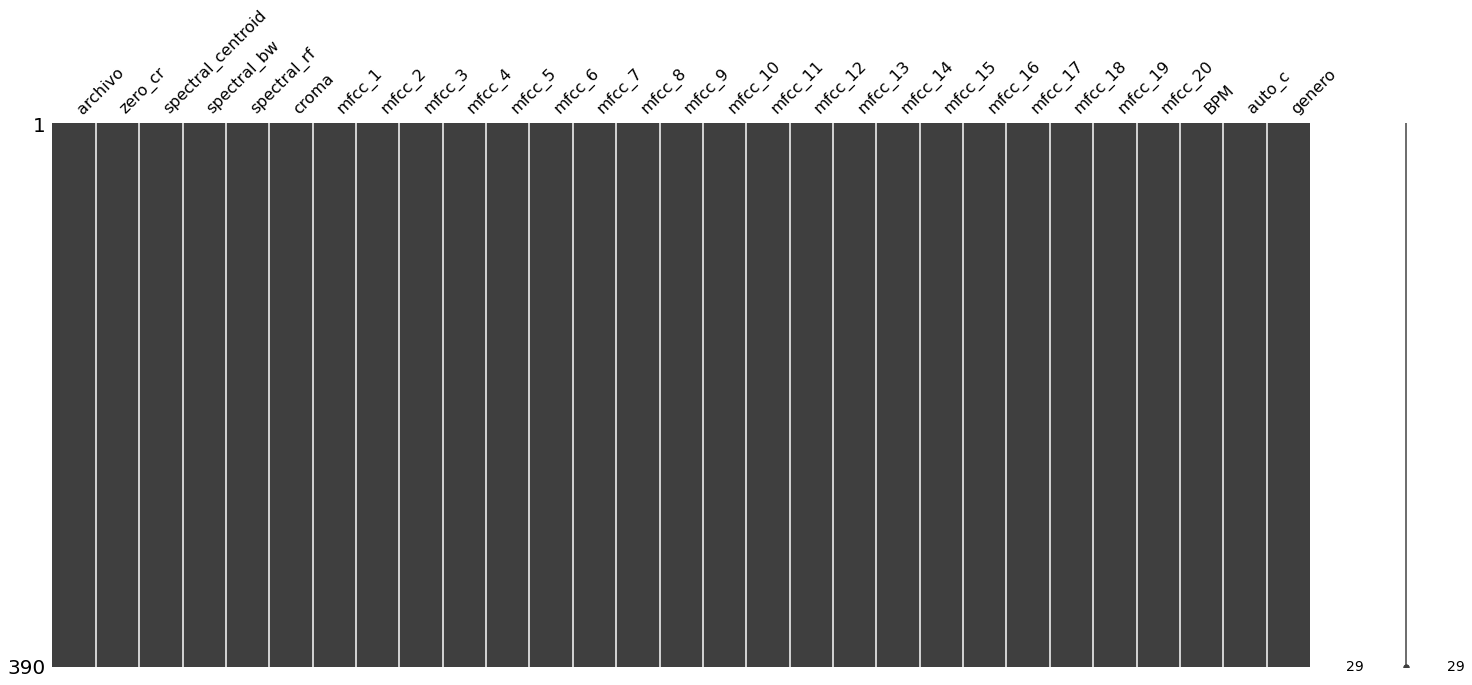

In [47]:
msno.matrix(df)

In [48]:
df.groupby('genero').mean()

zero_cr  spectral_centroid  spectral_bw  spectral_rf     croma  \
genero                                                                         
electronica  7.715385        3664.769823  3719.675979  7857.998810  0.532508   
prog         4.892308        2633.703679  2944.731812  5422.004875  0.520611   
salsa        7.492308        2866.901424  3039.036636  5855.439288  0.419099   

                 mfcc_1      mfcc_2     mfcc_3     mfcc_4     mfcc_5  \
genero                                                                 
electronica  -65.689816  116.190062 -37.717804  45.229309 -21.328017   
prog        -121.510305  147.896507 -41.057114  46.850059   0.305706   
salsa       -204.440593  140.781212 -40.942452  49.471137 -11.883951   

                mfcc_6     mfcc_7     mfcc_8    mfcc_9    mfcc_10   mfcc_11  \
genero                                                                        
electronica  31.227044 -13.062522  19.865181 -6.606800  11.919786 -2.089726   
prog         26.756867  -6.182664  15.559259 -1.505437   9.135088  0.658689   
salsa        22.663284 -11.767072  11.368040 -3.840248   1.848151 -1.951899   

              mfcc_12   mfcc_13   mfcc_14   mfcc_15   mfcc_16   mfcc_17  \
genero                                                                    
electronica  6.901863  2.001522  2.897985  3.759977 -0.840888  4.367829   
prog         4.925011  1.455034  1.789769  1.790361 -1.988850 -0.077769   
salsa        3.850634 -0.208070 -2.329010  2.166250 -3.473790  0.526125   

              mfcc_18   mfcc_19   mfcc_20         BPM    auto_c  
genero                                                           
electronica -2.061035  5.707278 -2.616686  127.834031  0.534869  
prog        -2.959955  1.395956 -4.444564  123.038354  0.622049  
salsa       -3.216435  1.328346 -5.358968  116.143151  0.468924

In [49]:
df_prog = df[df['genero'] == 'prog']
df_salsa = df[df['genero'] == 'salsa']
df_electro = df[df['genero'] == 'electronica']

<ipython-input-50-26f5e1ab8b7a>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_prog.hist(ax = ax)


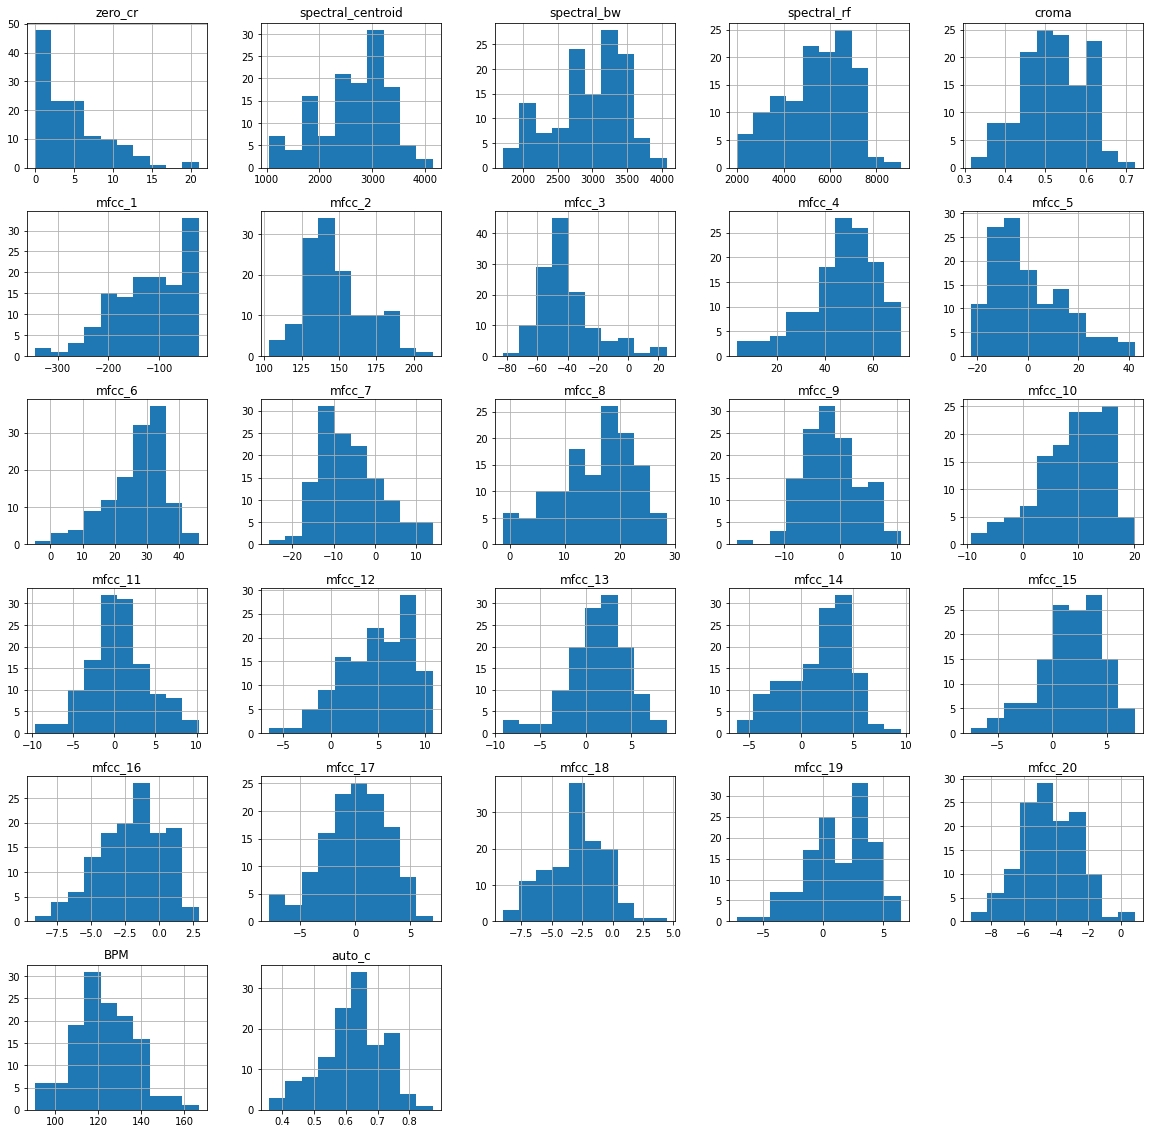

In [50]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df_prog.hist(ax = ax)
plt.show()

<ipython-input-51-e0c31872f431>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_salsa.hist(ax = ax)


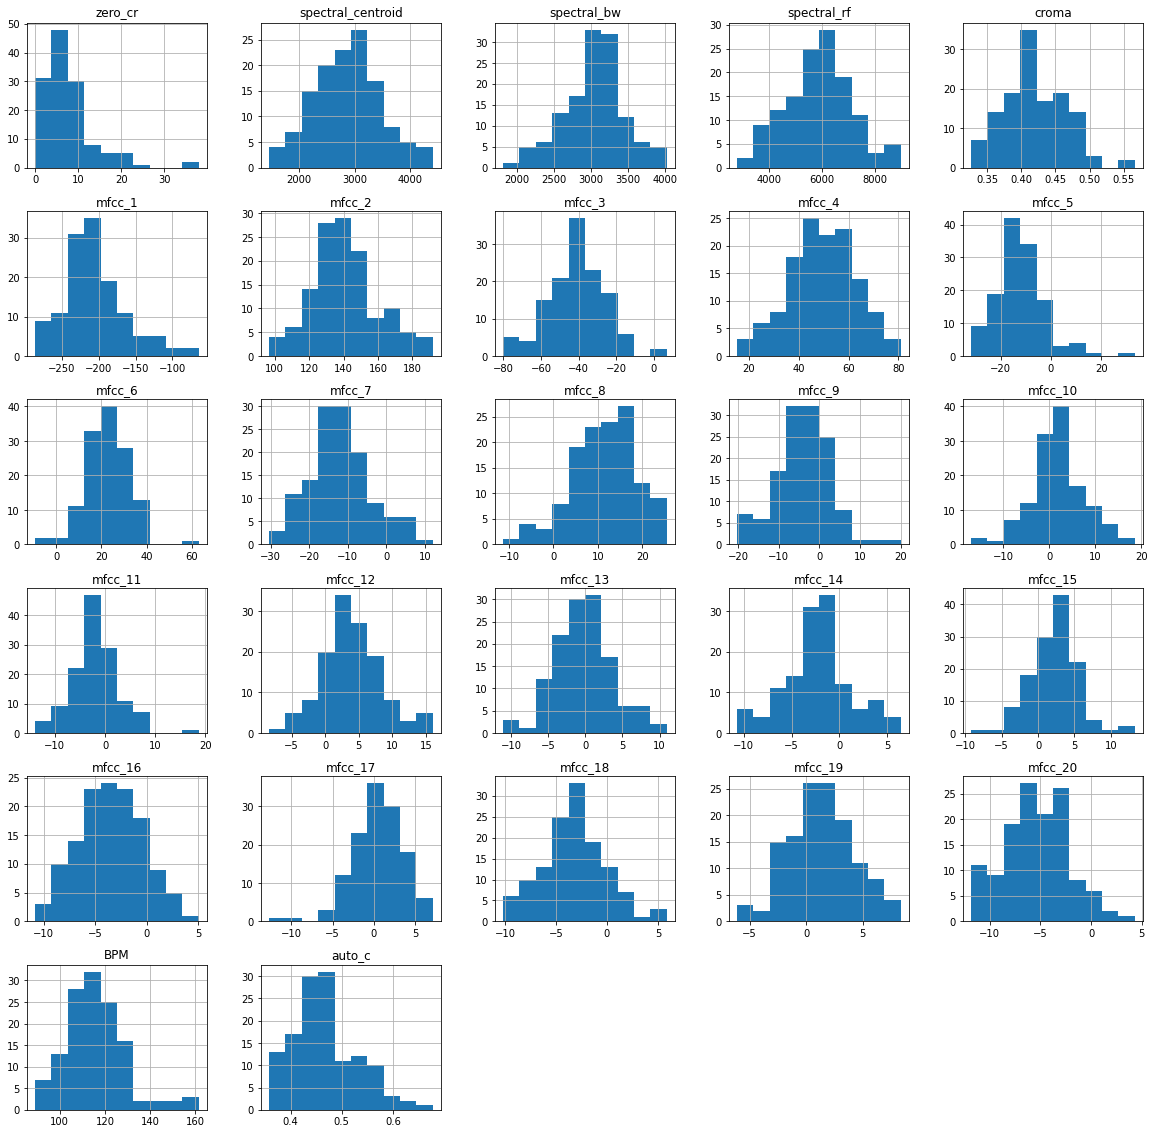

In [51]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df_salsa.hist(ax = ax)
plt.show()

<ipython-input-52-beba6172af1c>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_electro.hist(ax = ax)


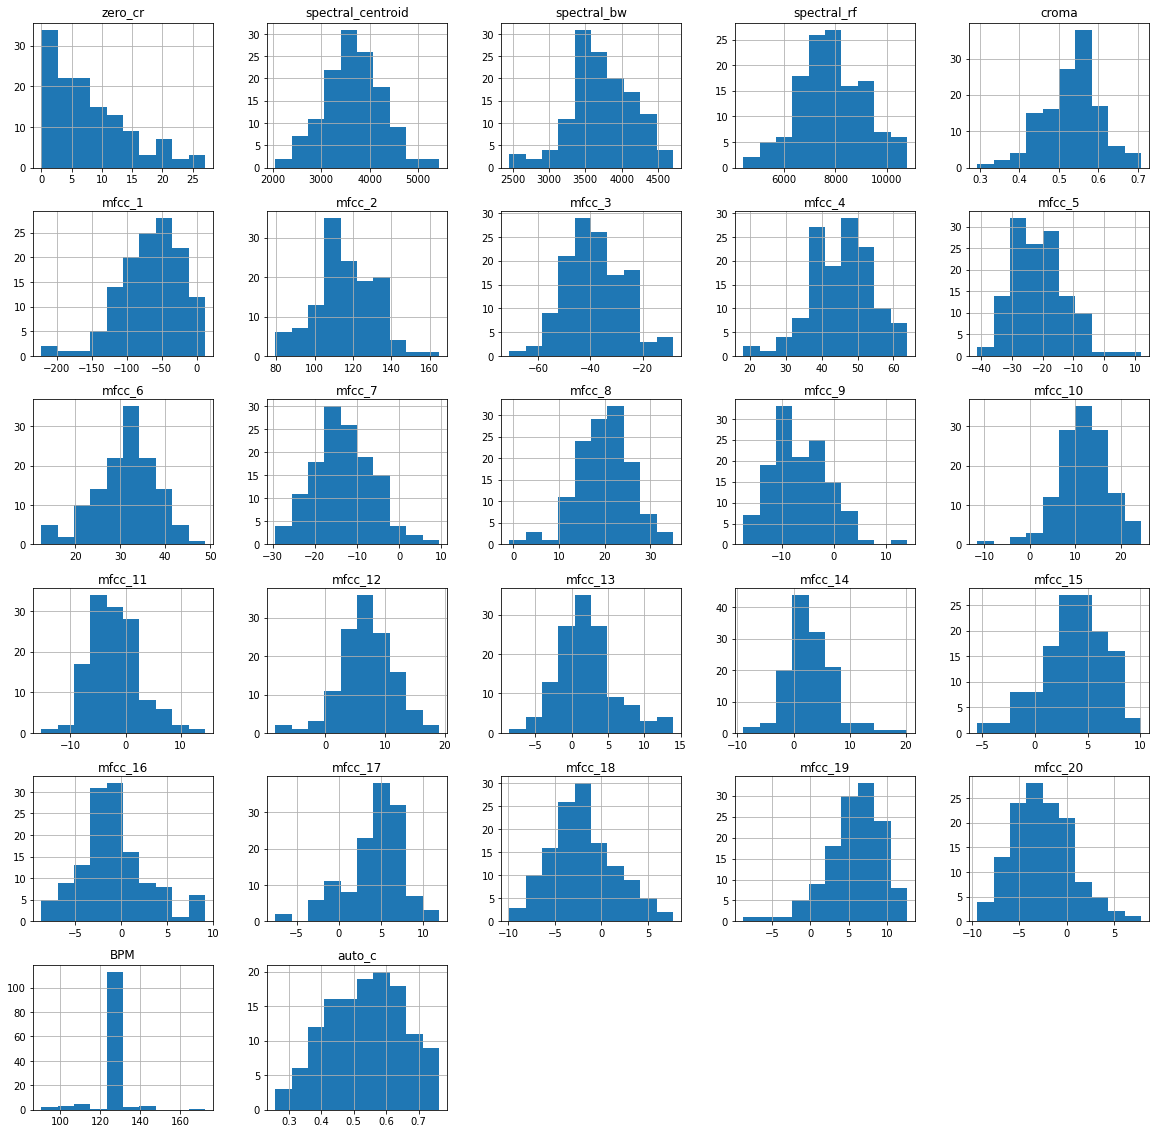

In [52]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df_electro.hist(ax = ax)
plt.show()

<ipython-input-53-3d4109f8dcee>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


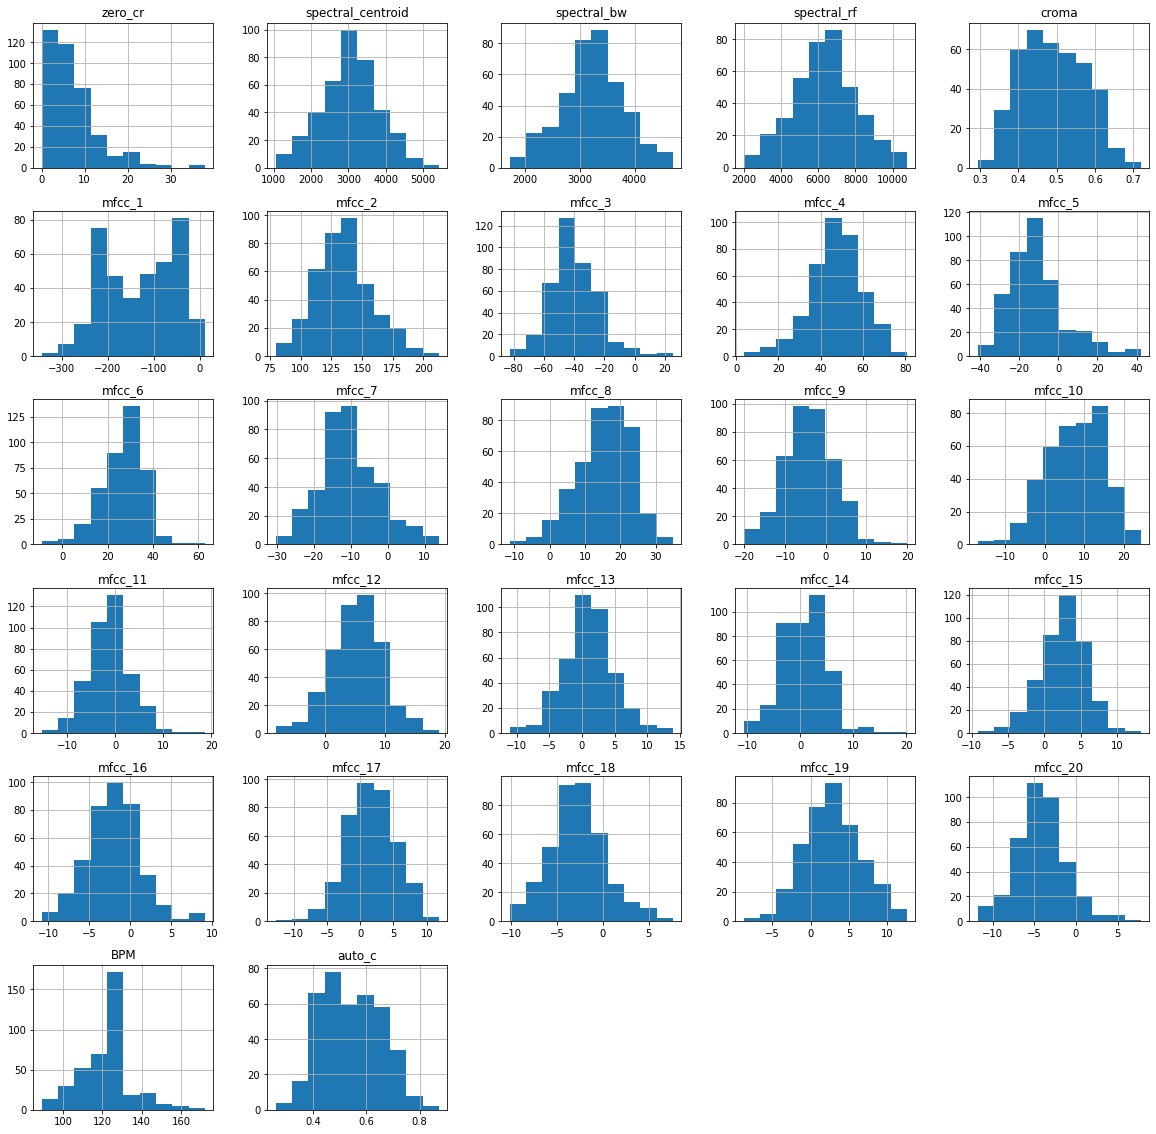

In [53]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

/home/spqr14/Desarrollo/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='zero_cr', ylabel='Density'>

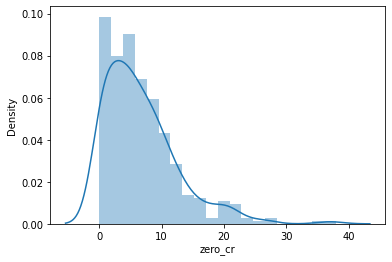

In [54]:
sns.distplot(df['zero_cr'])

/home/spqr14/Desarrollo/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='zero_cr', ylabel='Density'>

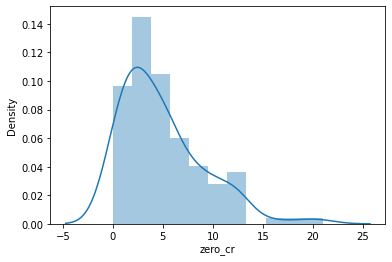

In [55]:
sns.distplot(df_prog['zero_cr'])

/home/spqr14/Desarrollo/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='zero_cr', ylabel='Density'>

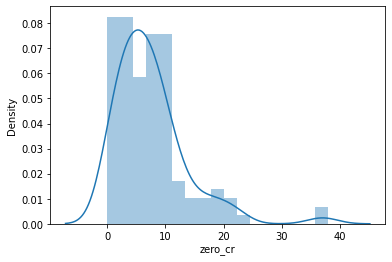

In [56]:
sns.distplot(df_salsa['zero_cr'])

/home/spqr14/Desarrollo/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='zero_cr', ylabel='Density'>

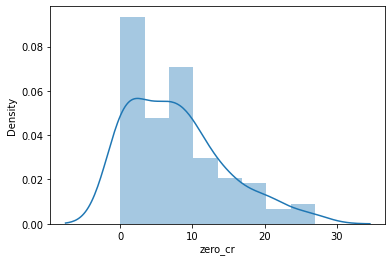

In [57]:
sns.distplot(df_electro['zero_cr'])

/home/spqr14/Desarrollo/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='croma', ylabel='Density'>

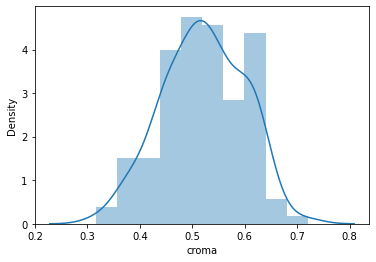

In [58]:
sns.distplot(df_prog['croma'])

/home/spqr14/Desarrollo/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='croma', ylabel='Density'>

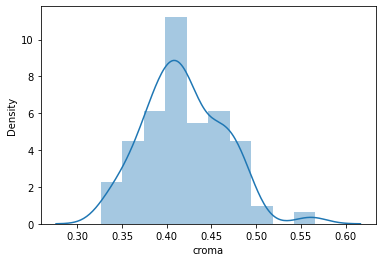

In [59]:
sns.distplot(df_salsa['croma'])

/home/spqr14/Desarrollo/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='croma', ylabel='Density'>

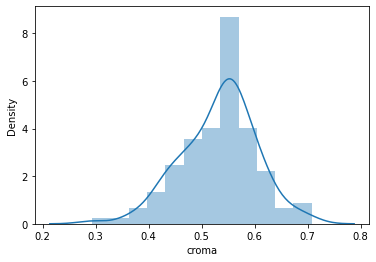

In [60]:
sns.distplot(df_electro['croma'])

/home/spqr14/Desarrollo/datascience/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='genero', ylabel='zero_cr'>

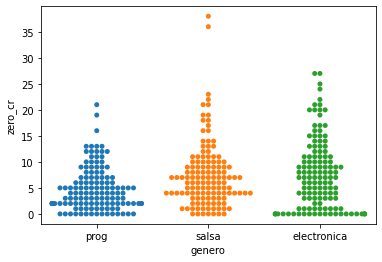

In [61]:
sns.swarmplot(x="genero", y="zero_cr", data=df)

/home/spqr14/Desarrollo/datascience/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 68.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='genero', ylabel='BPM'>

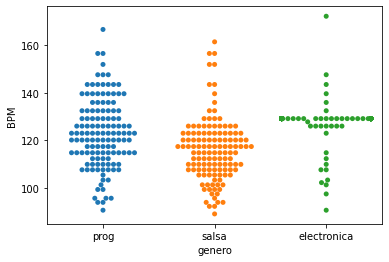

In [62]:
sns.swarmplot(x="genero", y="BPM", data=df)

<AxesSubplot:xlabel='genero', ylabel='croma'>

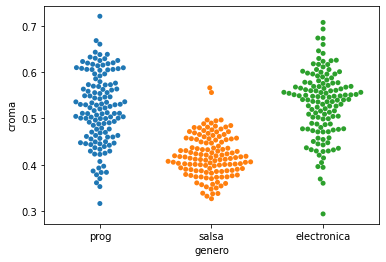

In [63]:
sns.swarmplot(x="genero", y="croma", data=df)

<AxesSubplot:xlabel='genero', ylabel='auto_c'>

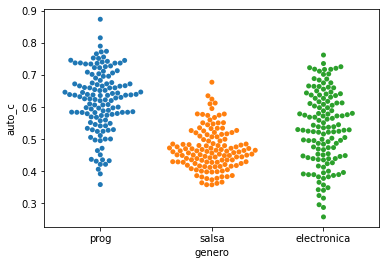

In [64]:
sns.swarmplot(x="genero", y="auto_c", data=df)

<AxesSubplot:xlabel='genero', ylabel='spectral_bw'>

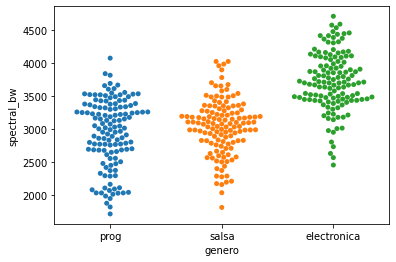

In [65]:
sns.swarmplot(x="genero", y="spectral_bw", data=df)

<AxesSubplot:xlabel='genero', ylabel='spectral_rf'>

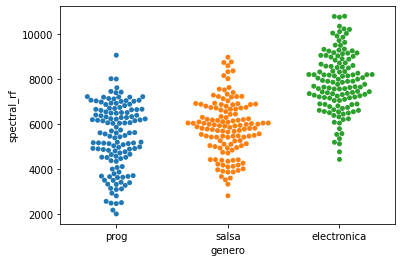

In [66]:
sns.swarmplot(x="genero", y="spectral_rf", data=df)

<AxesSubplot:xlabel='genero', ylabel='spectral_centroid'>

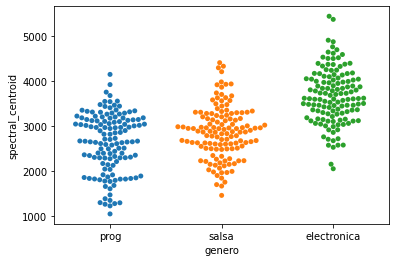

In [67]:
sns.swarmplot(x="genero", y="spectral_centroid", data=df)

In [68]:
df_viz = df[['zero_cr', 'spectral_centroid', 'spectral_bw', 'spectral_rf', 'croma', 'BPM', 'auto_c', 'genero']]

In [69]:
df_viz.head()

zero_cr  spectral_centroid  spectral_bw  spectral_rf     croma         BPM  \
0        1        2293.509095  2683.886294  4757.554813  0.643105  114.843750   
1        5        3141.585609  3664.541952  7047.756145  0.503582  103.359375   
2        1        1680.061228  2162.740693  3263.894535  0.511010  117.453835   
3        7        3550.627527  3837.029126  8001.494493  0.369874   95.703125   
4        7        3354.309483  3504.496655  7045.300942  0.555797  143.554688   

     auto_c genero  
0  0.584401   prog  
1  0.606677   prog  
2  0.606784   prog  
3  0.579578   prog  
4  0.696015   prog

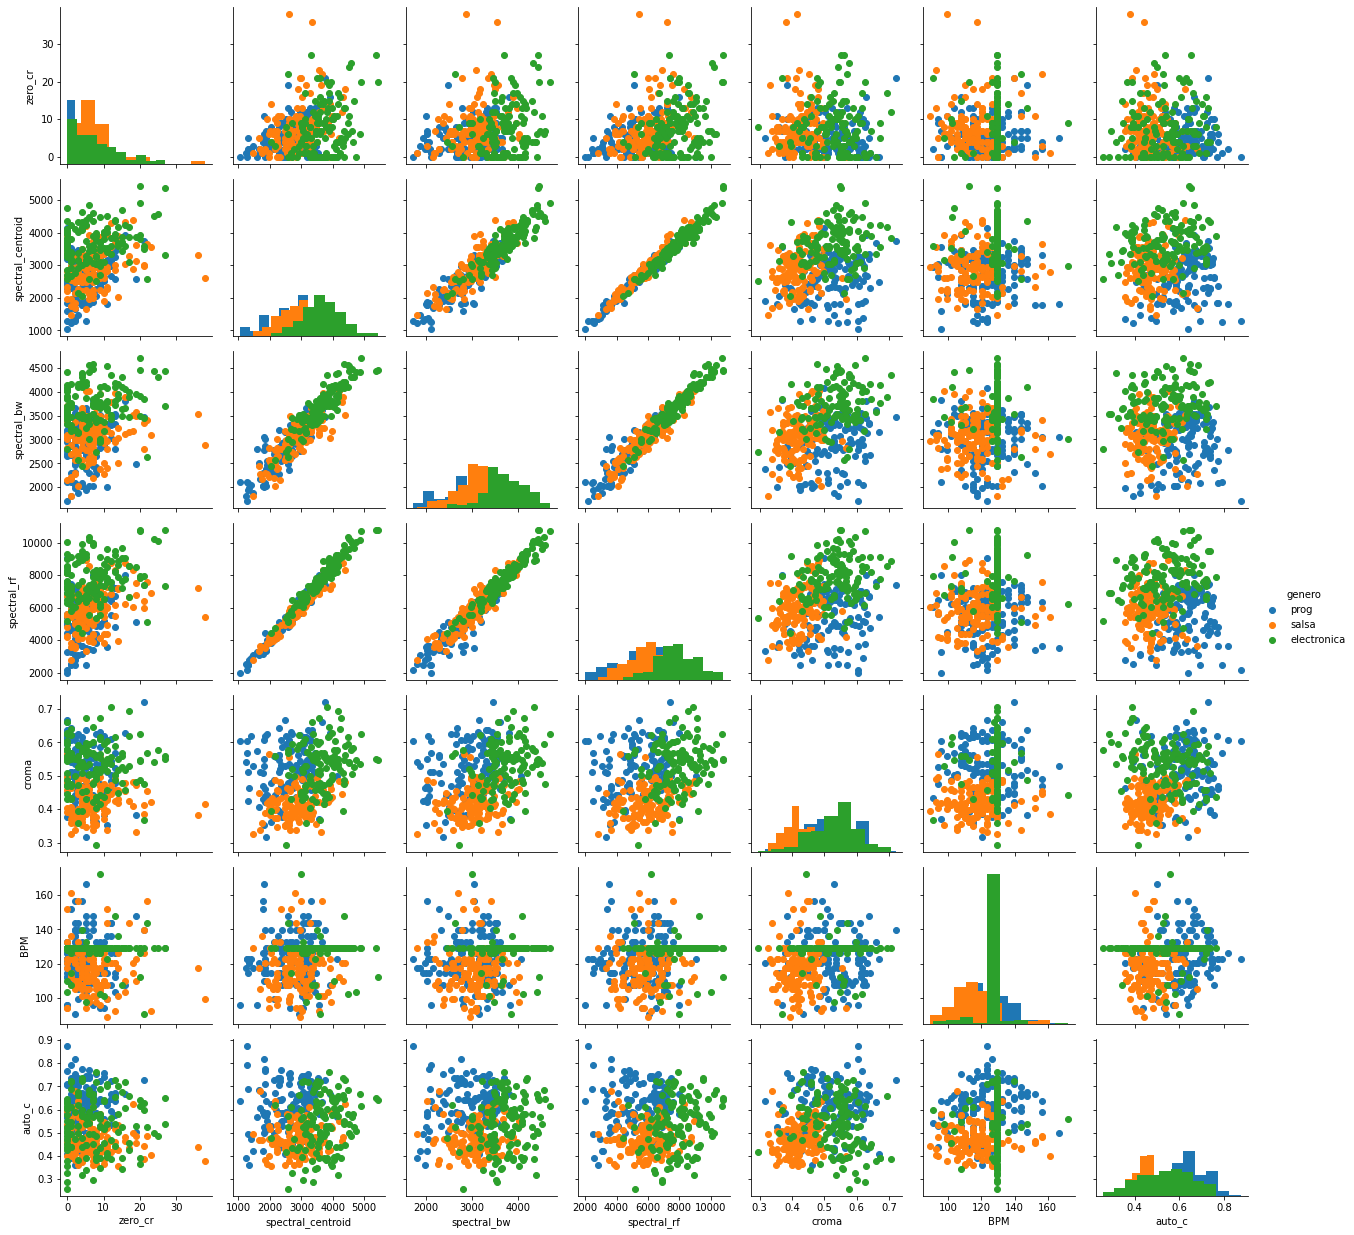

In [70]:
g = sns.PairGrid(df_viz, hue="genero")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

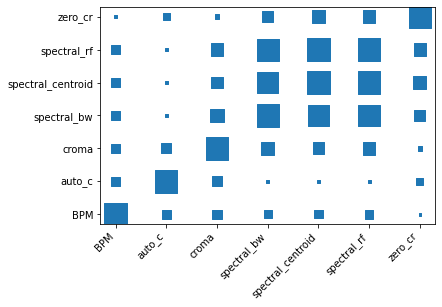

In [71]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num),
        y=y.map(y_to_num), 
        s=size * size_scale, 
        marker='s' 
    )
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
data = df
columns = ['zero_cr', 'spectral_centroid', 'spectral_bw', 'spectral_rf', 'croma', 'BPM', 'auto_c'] 
corr = data[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') 
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

In [72]:
vars_num = 'zero_cr spectral_centroid spectral_bw spectral_rf croma mfcc_1 mfcc_2 mfcc_3 mfcc_4 mfcc_5 mfcc_6 mfcc_7 mfcc_8 mfcc_9 mfcc_10 mfcc_11 mfcc_12 mfcc_13 mfcc_14 mfcc_15 mfcc_16 mfcc_17 mfcc_18 mfcc_19 mfcc_20 BPM auto_c'
vars_num = vars_num.split()

In [73]:
len(vars_num)

27

In [74]:
df_pg = df.groupby('genero').mean()

In [75]:
df_pg

zero_cr  spectral_centroid  spectral_bw  spectral_rf     croma  \
genero                                                                         
electronica  7.715385        3664.769823  3719.675979  7857.998810  0.532508   
prog         4.892308        2633.703679  2944.731812  5422.004875  0.520611   
salsa        7.492308        2866.901424  3039.036636  5855.439288  0.419099   

                 mfcc_1      mfcc_2     mfcc_3     mfcc_4     mfcc_5  \
genero                                                                 
electronica  -65.689816  116.190062 -37.717804  45.229309 -21.328017   
prog        -121.510305  147.896507 -41.057114  46.850059   0.305706   
salsa       -204.440593  140.781212 -40.942452  49.471137 -11.883951   

                mfcc_6     mfcc_7     mfcc_8    mfcc_9    mfcc_10   mfcc_11  \
genero                                                                        
electronica  31.227044 -13.062522  19.865181 -6.606800  11.919786 -2.089726   
prog         26.756867  -6.182664  15.559259 -1.505437   9.135088  0.658689   
salsa        22.663284 -11.767072  11.368040 -3.840248   1.848151 -1.951899   

              mfcc_12   mfcc_13   mfcc_14   mfcc_15   mfcc_16   mfcc_17  \
genero                                                                    
electronica  6.901863  2.001522  2.897985  3.759977 -0.840888  4.367829   
prog         4.925011  1.455034  1.789769  1.790361 -1.988850 -0.077769   
salsa        3.850634 -0.208070 -2.329010  2.166250 -3.473790  0.526125   

              mfcc_18   mfcc_19   mfcc_20         BPM    auto_c  
genero                                                           
electronica -2.061035  5.707278 -2.616686  127.834031  0.534869  
prog        -2.959955  1.395956 -4.444564  123.038354  0.622049  
salsa       -3.216435  1.328346 -5.358968  116.143151  0.468924

In [76]:
paleta = dict(zip(df_pg.zero_cr.unique(), ["orange","yellow","brown"]))
colores = df_pg.zero_cr.map(paleta)

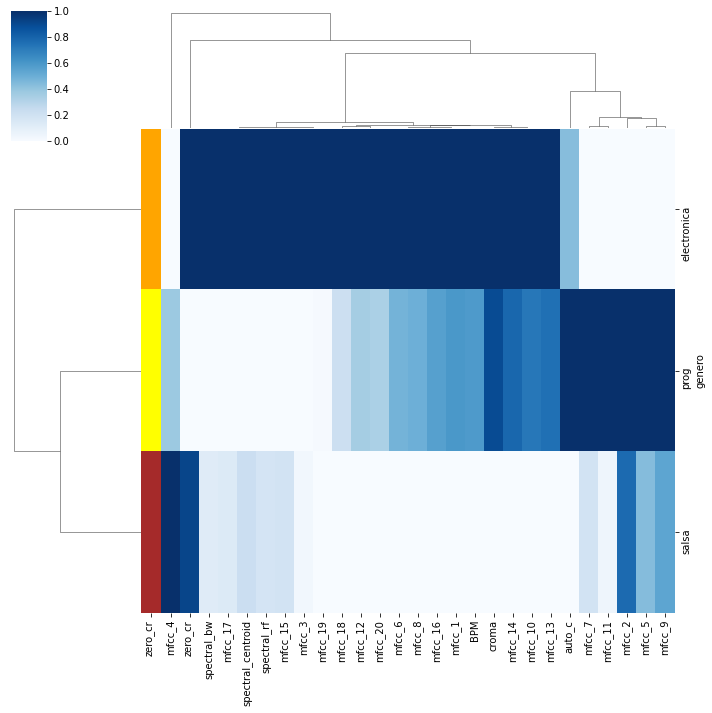

In [77]:
sns.clustermap(df_pg, metric="correlation", method="single", cmap="Blues", standard_scale=1, row_colors=colores)

Con todas estas visualizaciones podemos darnos una idea a priori de las relaciones que hay entre los tres géneros según sus caracterísicas. Sin embargo, esto sigue siendo una aproximación trivial del fenómeno y sigue sujeto a la interpretación humana. A continuación se modelerá para comprobar si la computadora es capaz de reconocer entre géneros dadas las características de la señal de audio que se extrajeron con anterioridad.

In [78]:
del(df_viz) #liberamos memoria

### Modelado

In [79]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.manifold import MDS
from sklearn.metrics import confusion_matrix
import pickle

In [80]:
"""
Se crea un data frame auxiliar sin el nombre de los archivos, esto porque más adelante se usará el 
nombre del archivo.
""" 
df_aux = df.drop(['archivo'], axis = 1)

In [81]:
df_aux.head()

zero_cr  spectral_centroid  spectral_bw  spectral_rf     croma      mfcc_1  \
0        1        2293.509095  2683.886294  4757.554813  0.643105 -107.567894   
1        5        3141.585609  3664.541952  7047.756145  0.503582  -97.363564   
2        1        1680.061228  2162.740693  3263.894535  0.511010 -186.118713   
3        7        3550.627527  3837.029126  8001.494493  0.369874 -142.130707   
4        7        3354.309483  3504.496655  7045.300942  0.555797  -43.405849   

       mfcc_2     mfcc_3     mfcc_4     mfcc_5     mfcc_6     mfcc_7  \
0  152.844116 -47.212082  50.548176  13.318098  22.069689   3.088564   
1  138.735413 -31.410593  44.795269  -9.141349  32.790367 -17.083845   
2  182.038437 -33.291286  14.278953  24.466728  25.350159  -0.241039   
3  124.016747 -28.411285  71.573174  -7.814272  39.571209 -25.599236   
4  126.121994 -45.979034  67.328064 -10.203604  28.056236 -13.199381   

      mfcc_8     mfcc_9    mfcc_10   mfcc_11    mfcc_12   mfcc_13   mfcc_14  \
0  17.724556   1.989238  14.602591  7.684421   5.756142  6.381130  3.533900   
1  13.887798  -9.632196  15.888204 -2.834174   4.603606 -9.116914 -1.892696   
2  12.623992   1.569721   2.149368  1.742047  -0.369495 -0.509848 -1.499376   
3   9.665070 -18.384262  11.907782 -9.657818   1.648516 -5.068522  2.381685   
4  22.499807  -4.032993  18.731100  1.584014  10.170861  2.690039  4.339613   

    mfcc_15   mfcc_16   mfcc_17   mfcc_18   mfcc_19   mfcc_20         BPM  \
0  3.980881  0.115263 -2.570839 -3.316376  3.695076 -3.231804  114.843750   
1 -4.428424 -1.632581 -6.181627 -6.994590 -1.032068 -1.391677  103.359375   
2  1.330057 -2.710043 -3.433610 -5.454858 -0.333768 -5.713842  117.453835   
3 -3.611597 -3.626019  0.854850 -0.206339  4.414690 -5.993470   95.703125   
4  3.185012 -5.508703 -0.216938 -8.121754  2.781256 -5.203200  143.554688   

     auto_c genero  
0  0.584401   prog  
1  0.606677   prog  
2  0.606784   prog  
3  0.579578   prog  
4  0.696015   prog

In [82]:
def codificar_generos(x):
    if x == 'prog':
        return 0
    elif x == 'salsa':
        return 1
    elif x == 'electronica':
        return 2

In [83]:
df_aux['target'] = df_aux['genero'].map(codificar_generos)

In [84]:
df_aux = df_aux.drop(['genero'], axis = 1)

In [85]:
df_aux

zero_cr  spectral_centroid  spectral_bw  spectral_rf     croma  \
0          1        2293.509095  2683.886294  4757.554813  0.643105   
1          5        3141.585609  3664.541952  7047.756145  0.503582   
2          1        1680.061228  2162.740693  3263.894535  0.511010   
3          7        3550.627527  3837.029126  8001.494493  0.369874   
4          7        3354.309483  3504.496655  7045.300942  0.555797   
..       ...                ...          ...          ...       ...   
385        0        3779.652769  3869.758625  8130.712153  0.551251   
386       11        4137.144823  3792.742738  8497.862780  0.549925   
387        0        4128.557988  3621.254511  8180.170802  0.578128   
388        6        3452.307281  3320.949943  7031.678968  0.569218   
389       10        4017.641481  3697.407863  8188.597008  0.540007   

         mfcc_1      mfcc_2     mfcc_3     mfcc_4     mfcc_5     mfcc_6  \
0   -107.567894  152.844116 -47.212082  50.548176  13.318098  22.069689   
1    -97.363564  138.735413 -31.410593  44.795269  -9.141349  32.790367   
2   -186.118713  182.038437 -33.291286  14.278953  24.466728  25.350159   
3   -142.130707  124.016747 -28.411285  71.573174  -7.814272  39.571209   
4    -43.405849  126.121994 -45.979034  67.328064 -10.203604  28.056236   
..          ...         ...        ...        ...        ...        ...   
385  -11.051632  122.787086 -39.625397  42.033005 -26.507195  30.913094   
386  -66.424446  102.736069 -45.718067  59.571732 -19.742508  40.078110   
387  -41.275997   91.801277 -71.001747  39.332413 -32.403278  28.891922   
388  -74.096519  110.111351 -62.542309  44.250938 -17.907671  31.221333   
389  -26.945227  112.117798 -54.145309  59.633564 -30.593407  42.807468   

        mfcc_7     mfcc_8     mfcc_9    mfcc_10   mfcc_11    mfcc_12  \
0     3.088564  17.724556   1.989238  14.602591  7.684421   5.756142   
1   -17.083845  13.887798  -9.632196  15.888204 -2.834174   4.603606   
2    -0.241039  12.623992   1.569721   2.149368  1.742047  -0.369495   
3   -25.599236   9.665070 -18.384262  11.907782 -9.657818   1.648516   
4   -13.199381  22.499807  -4.032993  18.731100  1.584014  10.170861   
..         ...        ...        ...        ...       ...        ...   
385 -19.432491  20.237757  -9.788039  12.867553 -6.959249   5.861841   
386 -17.179028  21.637266  -8.124650  13.257261 -1.546238   8.515308   
387 -17.177076  18.814869  -9.812453   8.266385 -3.661413   5.125349   
388  -7.763180  16.104729  -5.606269   8.063802  0.062140   5.332197   
389  -9.217725  21.356928 -11.464149  10.837396 -3.102428   3.838598   

      mfcc_13   mfcc_14   mfcc_15   mfcc_16   mfcc_17   mfcc_18    mfcc_19  \
0    6.381130  3.533900  3.980881  0.115263 -2.570839 -3.316376   3.695076   
1   -9.116914 -1.892696 -4.428424 -1.632581 -6.181627 -6.994590  -1.032068   
2   -0.509848 -1.499376  1.330057 -2.710043 -3.433610 -5.454858  -0.333768   
3   -5.068522  2.381685 -3.611597 -3.626019  0.854850 -0.206339   4.414690   
4    2.690039  4.339613  3.185012 -5.508703 -0.216938 -8.121754   2.781256   
..        ...       ...       ...       ...       ...       ...        ...   
385  0.089129  0.610427  2.437625 -3.428694  3.982030 -6.217256   7.249422   
386  2.276206  3.763591  3.035098 -3.323555  4.815642 -6.009607   6.773786   
387  2.822936  1.377450  5.430400 -1.442914  7.194168 -1.599219   7.708047   
388  6.380871  4.751428  8.165768 -0.022410  5.887846 -1.152788   9.140816   
389  5.748007  2.433439  4.187824 -8.400435  3.062189 -3.636799  11.610293   

      mfcc_20         BPM    auto_c  target  
0   -3.231804  114.843750  0.584401       0  
1   -1.391677  103.359375  0.606677       0  
2   -5.713842  117.453835  0.606784       0  
3   -5.993470   95.703125  0.579578       0  
4   -5.203200  143.554688  0.696015       0  
..        ...         ...       ...     ...  
385 -3.981704  129.199219  0.499707       2  
386 -3.861818  129.199219  0.400527       2  
387 -2.012374  129.199219  0.644191

In [86]:
# Creamos una variable X que contenga todas las características y una Y que sea el 'target'
X = df_aux[vars_num].copy()
Y = df_aux['target'].copy()

In [87]:
# Escalamos las columnas
sc = MinMaxScaler()
sc.fit(X)
Xs = pd.DataFrame(sc.transform(X),columns=X.columns)

In [88]:
#dividimos el data frame 
X_train,X_test,y_train,y_test = train_test_split(Xs,Y, train_size = 0.7)
print(f'Tamaño x_train: {len(X_train)}\nTamaño y_train: {len(y_train)}\nTamaño x_test: {len(X_test)}\nTamaño y_test: {len(y_test)}')
print(f'Porcentajes: \ntrain: {(len(X_train) / 390) * 100}%\ntest: {(len(X_test) / 390) * 100}%' )

Tamaño x_train: 273
Tamaño y_train: 273
Tamaño x_test: 117
Tamaño y_test: 117
Porcentajes: 
train: 70.0%
test: 30.0%


#### K vecinos

In [89]:
from sklearn.neighbors import KNeighborsClassifier
modelo = KNeighborsClassifier()
modelo.fit(X_train, y_train)

KNeighborsClassifier()

In [90]:
print(f'TRAIN: {accuracy_score(y_pred=modelo.predict(X_train),y_true=y_train)}')
print(f'TEST: {accuracy_score(y_pred=modelo.predict(X_test),y_true=y_test)}')

TRAIN: 0.8937728937728938
TEST: 0.9145299145299145


In [91]:
param=dict(n_neighbors = range(3,66),
weights = ['uniform','distance'])

In [92]:
grid = GridSearchCV(param_grid=param,cv=3,n_jobs=-1,estimator=modelo,verbose=True)

In [93]:
%%time
grid.fit(X_test,y_test)

Fitting 3 folds for each of 126 candidates, totalling 378 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s


CPU times: user 432 ms, sys: 172 ms, total: 603 ms
Wall time: 2.34 s


[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 378 out of 378 | elapsed:    2.2s finished


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(3, 66),
                         'weights': ['uniform', 'distance']},
             verbose=True)

In [94]:
grid.best_score_

0.905982905982906

In [95]:
grid.best_params_

{'n_neighbors': 6, 'weights': 'distance'}

In [96]:
modelo=grid.best_estimator_

In [97]:
print(f'TRAIN: {accuracy_score(y_pred=modelo.predict(X_train),y_true=y_train)}')
print(f'TEST: {accuracy_score(y_pred=modelo.predict(X_test),y_true=y_test)}')
print(f'Diferencia: {abs(accuracy_score(y_pred=modelo.predict(X_test),y_true=y_test) - accuracy_score(y_pred=modelo.predict(X_train),y_true=y_train))}')

TRAIN: 0.8754578754578755
TEST: 1.0
Diferencia: 0.12454212454212454


In [98]:
print(confusion_matrix(y_true=y_train,y_pred = modelo.predict(X_train)))
print(confusion_matrix(y_true=y_test,y_pred = modelo.predict(X_test)))

[[79  9  2]
 [ 7 82  2]
 [ 5  9 78]]
[[40  0  0]
 [ 0 39  0]
 [ 0  0 38]]


In [99]:
#comprobación visual
mds_2d = MDS(n_components = 2)

In [100]:
df_2d = pd.DataFrame(mds_2d.fit_transform(Xs), columns = ['d1', 'd2'])

In [101]:
df_2d['genero'] = df['genero']

In [102]:
df_2d[u'^y'] = modelo.predict(Xs)

In [103]:
df_2d.head()

d1        d2 genero  ^y
0  0.813368 -0.057659   prog   0
1 -0.797621  0.143656   prog   0
2  0.717575  0.828345   prog   0
3 -1.033541  0.077637   prog   1
4  0.003575 -0.629120   prog   0

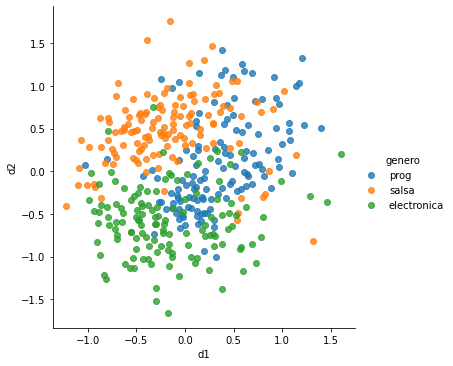

In [104]:
sns.lmplot(data = df_2d, x = 'd1', y = 'd2', hue = 'genero', fit_reg = False)

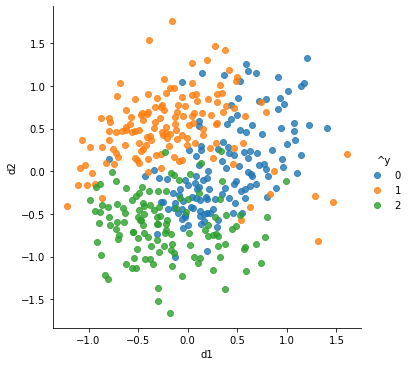

In [105]:
sns.lmplot(data = df_2d, x = 'd1', y = 'd2', hue = '^y', fit_reg = False)

In [106]:
#K vecinos resultó ser un buen modelo, sin embargo los clusters no son tan diferenciables entre sí visualmente.
#Podemos ver en funcionamiento el modelo con un ejemplo práctico

In [107]:
pickle.dump(modelo,open('../modelos/kvecinos.md', 'wb'))

### K-means

In [108]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D

In [109]:
X_a = np.array(Xs[vars_num])
y_a = np.array(Y)

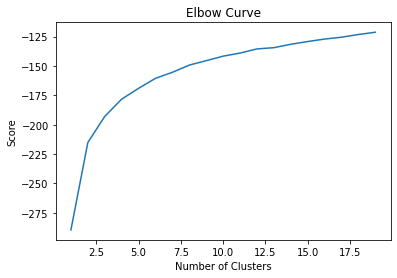

In [110]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X_a).score(X_a) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [111]:
modelo = KMeans(n_clusters = 3)
modelo.fit(X_a)

KMeans(n_clusters=3)

In [112]:
print(modelo.cluster_centers_)

[[0.10931174 0.23773058 0.27025874 0.25312573 0.45791285 0.42491675
  0.62096227 0.44528716 0.44508849 0.5631742  0.39305412 0.65383896
  0.44901014 0.54137191 0.49008842 0.50813439 0.41244032 0.52344487
  0.35742631 0.47751442 0.45047996 0.47962245 0.49101266 0.42400941
  0.4187078  0.39212313 0.48858114]
 [0.19453329 0.58155156 0.6506733  0.64394222 0.57287658 0.79178869
  0.30190011 0.37808074 0.59914591 0.27929694 0.57832071 0.38618288
  0.70241638 0.3467353  0.72434816 0.39649052 0.57045277 0.50901288
  0.4446317  0.57133157 0.48229624 0.6696169  0.4195718  0.6516995
  0.42532532 0.44434641 0.51385024]
 [0.2000446  0.437653   0.47315372 0.46649661 0.29323838 0.44286277
  0.43236064 0.38400422 0.6034681  0.33750705 0.4601792  0.39746548
  0.50210973 0.38482085 0.47553786 0.37671611 0.44629864 0.42183016
  0.27302719 0.4847457  0.35811721 0.52887964 0.35432172 0.46499865
  0.31875036 0.33687991 0.3588933 ]]


In [113]:
closest, _ = pairwise_distances_argmin_min(modelo.cluster_centers_, X_a)
closest

array([ 84, 294, 180])

In [114]:
cancion = df['archivo'].values

In [115]:
for row in closest:
    print(cancion[row])

04RagdollPhysics_02m_00s__03m_00s.mp3
GoHard_01m_00s__02m_00s.mp3
HAGAMOSLOQUEDIGAELCORAZON-GRUPONICHE_01m_00s__02m_00s.mp3


In [116]:
#Siendo estas las canciones más representativas según el modelo

In [117]:
mds_3d = MDS(n_components = 3)
df_3d = pd.DataFrame(mds_3d.fit_transform(Xs), columns = ['d1', 'd2', 'd3'])
df_3d['target'] = df_aux['target']

In [118]:
df_3d.head()

d1        d2        d3  target
0  0.231043 -0.529355  0.614999       0
1 -0.301815  0.375414 -0.625290       0
2 -0.315448 -0.021965  1.038268       0
3 -0.167457  0.659526 -0.742197       0
4  0.785713  0.121140  0.082792       0

In [119]:
X_a = np.array(df_3d[['d1', 'd2', 'd3']])
Y_a = np.array(df_aux['target'])
X_a.shape

(390, 3)

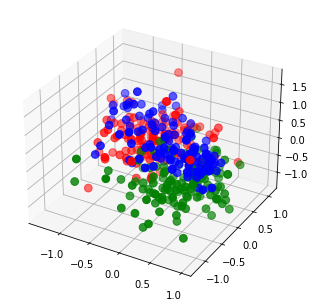

In [120]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green'] #Azul = prog, Rojo = salsa y Verde = electrónica
asignar=[]
for row in Y_a:
    asignar.append(colores[row])
ax.scatter(X_a[:, 0], X_a[:, 1], X_a[:, 2], c=asignar,s=60)
#Se debe verificar si con k-means se pueden pintar clusters diferenciados

In [121]:
kmeans = KMeans(n_clusters=3).fit(X_a)
centroids = kmeans.cluster_centers_
print(centroids)

[[-0.3144393  -0.16733245  0.60583086]
 [ 0.41694987 -0.15772682 -0.3347408 ]
 [-0.31661997  0.40605413 -0.09919614]]


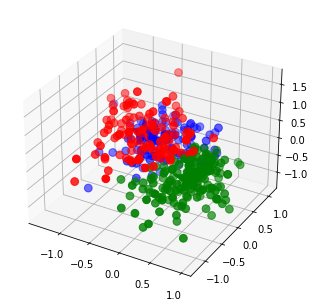

In [122]:
labels = kmeans.predict(X_a)
C = kmeans.cluster_centers_
colores=['red','green','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_a[:, 0], X_a[:, 1], X_a[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [123]:
lista_canciones =  pd.DataFrame()
lista_canciones['archivo']=df['archivo'].values
lista_canciones['genero']=df['genero'].values
lista_canciones['label'] = labels;
lista_canciones

archivo       genero  label
0                 08RosettaStoned_02m_00s__03m_00s.mp3         prog      0
1             12LaVillaStrangiato_02m_00s__03m_00s.mp3         prog      2
2                    10RightInTwo_02m_00s__03m_00s.mp3         prog      0
3                   CliffsofDover_02m_00s__03m_00s.mp3         prog      2
4                        03Tandem_02m_00s__03m_00s.mp3         prog      1
..                                                 ...          ...    ...
385                     JungleBae_01m_00s__02m_00s.mp3  electronica      1
386                         RASTA_01m_00s__02m_00s.mp3  electronica      1
387                      Reckless_01m_00s__02m_00s.mp3  electronica      1
388                        Krater_01m_00s__02m_00s.mp3  electronica      1
389  456MakeSomeNoise(DeorroRemix)_01m_00s__02m_00s...  electronica      1

[390 rows x 3 columns]

In [124]:
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=lista_canciones.groupby('label').size()
cantidadGrupo

color  cantidad
0    red       111
1  green       168
2   blue       111

Como se puede ver, KMeans no resulta ser el mejor modelo para clusterizar la música

### Red Neuronal

In [125]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [126]:
def metricas(modelo,Xt,Xv,yt,yv):
    print('roc:\n')
    print(roc_auc_score(y_true=yt,y_score=modelo.predict_proba(Xt)[:,1]))
    print(roc_auc_score(y_true=yv,y_score=modelo.predict_proba(Xv)[:,1]))
    print('accuracy:\n')
    print(accuracy_score(y_true=yt,y_pred=modelo.predict(Xt)))
    print(accuracy_score(y_true=yv,y_pred=modelo.predict(Xv)))

In [127]:
param=dict(hidden_layer_sizes = [(x,y,z,) for x in range(5,65,5) for y in range(5,65,5) for z in range(5,65,5)],
           activation = ['identity', 'logistic', 'tanh', 'relu'],
        learning_rate = ['constant', 'invscaling', 'adaptive'])

In [128]:
modelo = MLPClassifier()
modelo.fit(X_train,y_train)

print('accuracy:\n')
print(accuracy_score(y_true=y_train,y_pred=modelo.predict(X_train)))
print(accuracy_score(y_true=y_test,y_pred=modelo.predict(X_test)))


accuracy:

0.9340659340659341
0.9316239316239316


/home/spqr14/Desarrollo/datascience/lib64/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [129]:
grid = GridSearchCV(param_grid=param,cv=3,n_jobs=-1,estimator=modelo,verbose=True)
grid.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 20736 candidates, totalling 62208 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 11234 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 12784 tasks      | elapsed: 12

GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(5, 5, 5), (5, 5, 10),
                                                (5, 5, 15), (5, 5, 20),
                                                (5, 5, 25), (5, 5, 30),
                                                (5, 5, 35), (5, 5, 40),
                                                (5, 5, 45), (5, 5, 50),
                                                (5, 5, 55), (5, 5, 60),
                                                (5, 10, 5), (5, 10, 10),
                                                (5, 10, 15), (5, 10, 20),
                                                (5, 10, 25), (5, 10, 30),
                                                (5, 10, 35), (5, 10, 40),
                                                (5, 10, 45), (5, 10, 50),
                                                (5, 10, 55), (

In [130]:
print('accuracy:\n')
print(accuracy_score(y_true=y_train,y_pred=grid.best_estimator_.predict(X_train)))
print(accuracy_score(y_true=y_test,y_pred=grid.best_estimator_.predict(X_test)))

accuracy:

0.9413919413919414
0.905982905982906


In [131]:
grid.best_score_

0.923076923076923

In [132]:
grid.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (15, 60, 10),
 'learning_rate': 'adaptive'}

In [133]:
print(confusion_matrix(y_true=y_train,y_pred = modelo.predict(X_train)))
print(confusion_matrix(y_true=y_test,y_pred = modelo.predict(X_test)))

[[85  4  1]
 [ 4 86  1]
 [ 5  3 84]]
[[36  3  1]
 [ 0 37  2]
 [ 2  0 36]]


La red neuronal ha resultado un modelo excelente para la clasificación de la música por género según sus características

In [134]:
#comprobación visual
df_2d[u'^y'] = grid.best_estimator_.predict(Xs)

In [135]:
df_2d.head()

d1        d2 genero  ^y
0  0.813368 -0.057659   prog   0
1 -0.797621  0.143656   prog   0
2  0.717575  0.828345   prog   0
3 -1.033541  0.077637   prog   1
4  0.003575 -0.629120   prog   0

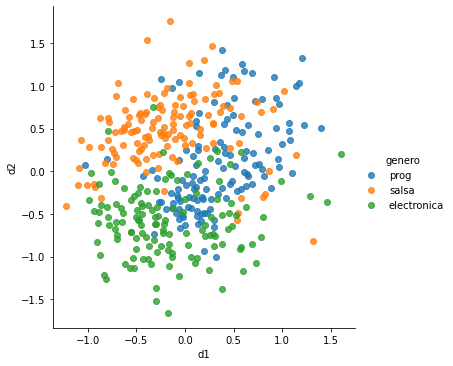

In [136]:
sns.lmplot(data = df_2d, x = 'd1', y = 'd2', hue = 'genero', fit_reg = False)

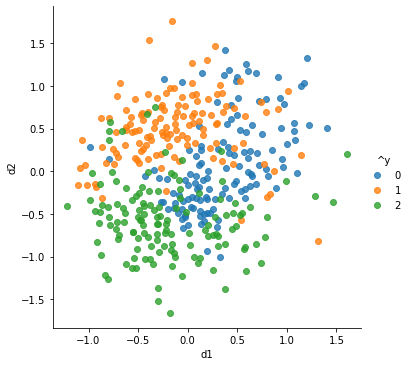

In [137]:
sns.lmplot(data = df_2d, x = 'd1', y = 'd2', hue = '^y', fit_reg = False)

In [138]:
#Comprobación práctica
nuevas = pd.read_csv('../data_set/datos_extra.csv', sep = ',', encoding = 'utf8')

In [139]:
nuevas.head()

Unnamed: 0                                            archivo  zero_cr  \
0           0       alan-walker-the-spectre_01m_00s__02m_00s.mp3       13   
1           1           haken-canary-yellow_01m_00s__02m_00s.mp3        4   
2           2  yiyo-sarante-corazon-de-acero_01m_00s__02m_00s...        7   

   spectral_centroid  spectral_bw  spectral_rf     croma      mfcc_1  \
0        3031.258353  3399.635905  6712.085907  0.475297 -126.701988   
1        2686.885940  3343.852570  6159.100882  0.404072 -117.402809   
2        2783.803519  2828.224130  6059.143652  0.367378 -132.949417   

       mfcc_2     mfcc_3     mfcc_4     mfcc_5     mfcc_6     mfcc_7  \
0  139.325592 -32.602020  52.075966 -24.586224  27.692787  -4.666080   
1  159.817459 -33.329964  46.731541 -20.501797  36.042309 -12.351538   
2  160.131683 -49.574703  60.388943 -21.228704  16.206688  -0.341111   

      mfcc_8     mfcc_9   mfcc_10   mfcc_11   mfcc_12    mfcc_13   mfcc_14  \
0  10.322944   1.928085  9.113652  4.995746  4.912806  12.626525  0.679829   
1  12.153014  -7.202322  3.897409 -0.091573 -0.636132   5.329140 -5.221859   
2 -13.248346  11.557903 -7.486615  3.940843 -4.140780   5.492134 -4.889418   

    mfcc_15   mfcc_16   mfcc_17   mfcc_18   mfcc_19   mfcc_20         BPM  \
0  9.365721 -1.254364  6.533236 -2.502665  3.100600 -0.787932  127.840909   
1  5.954822 -6.888618  1.948341 -4.144900  4.857601 -2.483621  119.680851   
2 -5.061451  3.822602 -9.364557  0.576622 -2.179988 -4.297481  114.795918   

     auto_c genero  
0  0.537159  extra  
1  0.644528  extra  
2  0.593162  extra

In [140]:
nuevas = nuevas.drop(['Unnamed: 0'], axis = 1)

In [141]:
X_n = nuevas[vars_num].copy()
sc.fit(X_n)
Xs_n = pd.DataFrame(sc.transform(X_n),columns=X_n.columns)

In [142]:
Xs_n

zero_cr  spectral_centroid  spectral_bw  spectral_rf     croma    mfcc_1  \
0  1.000000           1.000000     1.000000     1.000000  1.000000  0.401852   
1  0.000000           0.000000     0.902376     0.153087  0.340016  1.000000   
2  0.333333           0.281432     0.000000     0.000000  0.000000  0.000000   

     mfcc_2    mfcc_3    mfcc_4    mfcc_5    mfcc_6    mfcc_7    mfcc_8  \
0  0.000000  1.000000  0.391321  0.000000  0.579064  0.639899  0.927954   
1  0.984897  0.957111  0.000000  1.000000  1.000000  0.000000  1.000000   
2  1.000000  0.000000  1.000000  0.822029  0.000000  1.000000  0.000000   

    mfcc_9   mfcc_10   mfcc_11   mfcc_12   mfcc_13  mfcc_14   mfcc_15  \
0  0.48669  1.000000  1.000000  1.000000  1.000000  1.00000  1.000000   
1  0.00000  0.685774  0.000000  0.387101  0.000000  0.00000  0.763578   
2  1.00000  0.000000  0.792641  0.000000  0.022336  0.05633  0.000000   

    mfcc_16   mfcc_17   mfcc_18   mfcc_19   mfcc_20       BPM    auto_c  
0  0.526014  1.000000  0.347819  0.750341  1.000000  1.000000  0.000000  
1  0.000000  0.711602  0.000000  1.000000  0.516836  0.374468  1.000000  
2  1.000000  0.000000  1.000000  0.000000  0.000000  0.000000  0.521592

In [143]:
prog_nueva = Xs_n.iloc[[1]]
salsa_nueva = Xs_n.iloc[[2]]
electronica_nueva = Xs_n.iloc[[0]]

In [144]:
grid.best_estimator_.predict(prog_nueva)

array([0])

In [145]:
grid.best_estimator_.predict(salsa_nueva)

array([1])

In [146]:
grid.best_estimator_.predict(electronica_nueva)

array([2])

In [147]:
grid.best_estimator_.predict(salsa_nueva)

array([1])

In [148]:
grid.best_estimator_.predict(prog_nueva)

array([0])

In [149]:
#Para todas las pruebas lo hizo correctamente.

In [150]:
pickle.dump(grid.best_estimator_,open('../modelos/red_neuronal.md', 'wb'))